In [2]:
import tensorflow as tf
import numpy as np
from skimage import data
import matplotlib.pyplot as plt

# Tensorflow Datasets

In this notebook we show a brief demonstration of how to use tensorflow datasets and how they can be leveraged to easily implement data augmentation.

These are toy examples, but they they can be used to help you with the exercises in the other notebooks.

Below shows a simple example of creating & applying operations to a dataset. We first create some data (here we're using using fake random data as input). 

 - In the third line `tf.data.Dataset.from_tensor_slices` takes a list of array like objects (in this case numpy arrays) and converts it to a dataset. 

 - In the fourth line, we shuffle the dataset along the first dimension (i.e. along the sample axis). The buffer size sets how many examples to shuffle at once (useful when you have very large datasets that cannot completely be in memory all at once).

 - In the fifth line we create batches of size 32 samples each.


In [3]:
img = np.random.random((100, 10, 10, 3))
labels = np.random.random((100, ))

dataset = tf.data.Dataset.from_tensor_slices((img, labels))
dataset = dataset.shuffle(buffer_size=100)
dataset = dataset.batch(32)
dataset

<BatchDataset shapes: ((None, 10, 10, 3), (None,)), types: (tf.float64, tf.float64)>

Once we've create the dataset we can iterate over it using a normal python loop. We can see that this returns 4 batches where each batch is of size 32, except the last which is just the remainder

In [5]:
for images, labels in dataset:
    print(images.shape, labels.shape)

(32, 10, 10, 3) (32,)
(32, 10, 10, 3) (32,)
(32, 10, 10, 3) (32,)
(4, 10, 10, 3) (4,)


Below is an example of how to use tensorflow's built in data augmentation functions and apply them to a single image.

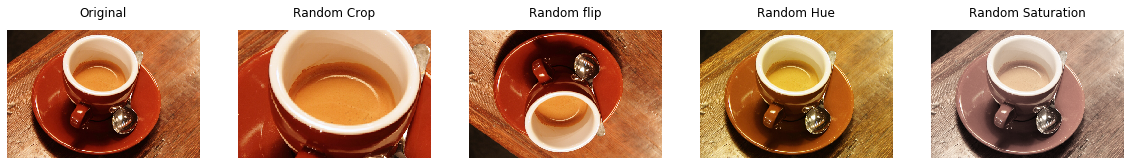

In [6]:
# Load a random image to test with
img = data.coffee()

# Apply different types of augmentation to the image
# Random crops with size height=200, width=300, and channels=3 (all channels)
img_crop = tf.image.random_crop(img, [200, 300, 3]).numpy()
# Randomly choose whether to flip the image
img_flip = tf.image.random_flip_up_down(img)
# Randomly perturbate the image hue
img_hue = tf.image.random_hue(img, 0.1)
# Randomly perturbate the image saturation 
img_sat = tf.image.random_saturation(img, 0.1, 0.5)

# Plot the examples
fig, axes = plt.subplots(1, 5, figsize=(20, 30))
[ax.axis('off') for ax in axes]
axes[0].matshow(img)
axes[0].set_title('Original')
axes[1].matshow(img_crop)
axes[1].set_title('Random Crop')
axes[2].matshow(img_flip)
axes[2].set_title('Random flip')
axes[3].matshow(img_hue)
axes[3].set_title('Random Hue')
axes[4].matshow(img_sat)
axes[4].set_title('Random Saturation')

plt.savefig('plot.png', dpi=300, bbox_inches='tight')

We can combine the data augmentation functions and tensorflow datasets easily by using the `map` function of tensorflow dataset. The `map` function takes another function and applies it to each sample in the dataset. In this example we take the MNIST dataset and apply random cropping, & flips to the images.

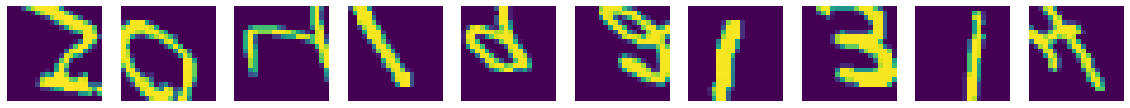

In [8]:
(img_train, label_train), test = tf.keras.datasets.mnist.load_data()

def random_crop(x):
    return tf.image.random_crop(x, [20, 20, 1])

dataset = tf.data.Dataset.from_tensor_slices(img_train)
# Here we expand_dims because flip_up_down requires a 4D image of [batch_size, height, width, channels]
dataset = dataset.map(lambda x: tf.expand_dims(x, axis=-1)) 
dataset = dataset.map(tf.image.flip_up_down)
dataset = dataset.map(random_crop)
dataset = dataset.take(10)

fig, axes = plt.subplots(1, 10, figsize=(20, 30))
for i, img in enumerate(dataset):
    axes[i].matshow(np.squeeze(img))
    axes[i].axis('off')